In [5]:
from analysis_utils import *
%load_ext autoreload
%reload_ext autoreload

import numpy as np
import pandas as pd

ptRNA = pd.read_excel('tRNAValues.xlsx',header=None)
gr04_ptRNA=ptRNA[0]
gr07_ptRNA=ptRNA[1]
gr107_ptRNA=ptRNA[2]
gr16_ptRNA=ptRNA[3]
gr25_ptRNA=ptRNA[4]

pCodon = pd.read_excel('codonValues.xlsx',header=None)
gr04_pCodon = pCodon[0]
gr07_pCodon = pCodon[1]
gr107_pCodon = pCodon[2]
gr16_pCodon = pCodon[3]
gr25_pCodon = pCodon[4]

rxndiff=dict()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
def computeBiasedElongationLatency(biasVal=1):
    sim_time_all = list()
    sim_time_std_all = list()
    transp_time_all = list()
    rxn_time_all = list()
    pcogrib_all = list()
    
    rib_gr = [4,8,9,9,8,7]
    ptRNA = [gr07_ptRNA,gr107_ptRNA,gr16_ptRNA,gr16_ptRNA,gr25_ptRNA,gr25_ptRNA]
    pCodon =  [gr07_pCodon,gr107_pCodon,gr16_pCodon,gr16_pCodon,gr25_pCodon,gr25_pCodon]

    for i,num_rib in enumerate(rib_gr):
        weight = cognateDistrib(ptRNA[i],pCodon[i])
        sim_time_gr = list()
        sim_time_gr_var=list()
        rxn_count_gr = list()
        transp_latency_gr = list()
        rxn_latency_gr = list()
        pcogrib_gr = list()

        num_tRNA=42
        for num_tRNA in np.arange(1,42):
            sim_times=list()
            rxn_count = list()
            transp_latency = list()
            rxn_latency = list()
            N=5000
            for i in range(N):
                rxn = eventbased_sim(rib_num=num_rib,tRNA_cog=num_tRNA,repeatAllowed=True,bias=biasVal,seed=5*i)
                sim_times.append(rxn[0])
                rxn_count.append(rxn[1])
                rxn_latency.append(rxn[2])
                transp_latency.append(rxn[0]-rxn[2])

            sim_time_gr.append(np.average(sim_times))
            rxn_count_gr.append(np.average(rxn_count))
            sim_time_gr_var.append(np.std(sim_times)**2)
            pcogrib_gr.append(rxn[3])
            
            transp_latency_gr.append(np.average(transp_latency))
            rxn_latency_gr.append(np.average(rxn_latency))

        #print(np.sum(sim_time_gr*weight[1:len(sim_time_gr)+1]))
        sim_time_all.append(np.sum(sim_time_gr*weight[1:len(sim_time_gr)+1]))
        sim_time_std_all.append(np.sqrt(np.sum((sim_time_gr_var)*weight[1:len(sim_time_gr)+1]))/np.sqrt(num_tRNA*N))
        transp_time_all.append(np.sum(transp_latency_gr*weight[1:len(transp_latency_gr)+1]))
        rxn_time_all.append(np.sum(rxn_latency_gr*weight[1:len(rxn_latency_gr)+1]))
        pcogrib_all.append(np.sum(pcogrib_gr*weight[1:len(rxn_latency_gr)+1]))
        
    return sim_time_all, sim_time_std_all, transp_time_all, rxn_time_all,pcogrib_all

In [7]:
#Most up to date
elongLatencyList = list()
elongLatency_STDlist = list()
transportLatencyList=list()
reactionLatencyList=list()
bias = np.arange(1,8,0.5)

for biasVal in bias:
    elongLatency, elongLatency_STD, tRNA_transport,tRNA_reaction,pcogrib = computeBiasedElongationLatency(biasVal)
    elongLatencyList.append(elongLatency)
    elongLatency_STDlist.append(elongLatency_STD)
    transportLatencyList.append(tRNA_transport)
    reactionLatencyList.append(tRNA_reaction)
    print("\n\nBias: ", biasVal, "\n", elongLatency, elongLatency_STD, "\n", tRNA_transport, "\n",tRNA_reaction,"\n",pcogrib)



Bias:  1.0 
 [37.215721172109255, 38.01854793851136, 36.11724642390144, 36.11724642390144, 36.909407789313505, 36.329348376660725] [0.11207904765504721, 0.1117731684052361, 0.10586493481132937, 0.10586493481132937, 0.10863670682158175, 0.1081525861470515] 
 [33.74284457225605, 30.79535421491456, 28.41837423120376, 28.41837423120376, 29.880803131700848, 30.348156273430067] 
 [3.4728765998532096, 7.223193723596804, 7.698872192697686, 7.698872192697686, 7.028604657612665, 5.981192103230661] 
 [0.04360248927919751, 0.044124795454265286, 0.0458232173357124, 0.0458232173357124, 0.047297877143508346, 0.047297877143508346]


Bias:  1.5 
 [24.73824138974023, 24.391610685193662, 23.28762248597301, 23.28762248597301, 23.699898932561236, 23.311441702910415] [0.07387924024128137, 0.07215670639196838, 0.06916819696918614, 0.06916819696918614, 0.07013820736102105, 0.06874499283879697] 
 [22.729068433528955, 20.687161489577235, 19.29707097354851, 19.29707097354851, 20.081721476478318, 20.15674938343

In [7]:


elongLatencyList = list()
elongLatency_STDlist = list()
transportLatencyList=list()
reactionLatencyList=list()
bias = np.arange(1,8,0.5)

for biasVal in bias:
    elongLatency, elongLatency_STD, tRNA_transport,tRNA_reaction,pcogrib = computeBiasedElongationLatency(biasVal)
    elongLatencyList.append(elongLatency)
    elongLatency_STDlist.append(elongLatency_STD)
    transportLatencyList.append(tRNA_transport)
    reactionLatencyList.append(tRNA_reaction)
    print("\n\nBias: ", biasVal, "\n", elongLatency, elongLatency_STD, "\n", tRNA_transport, "\n",tRNA_reaction,"\n",pcogrib)



Bias:  1.0 
 [37.55369102066618, 37.49948145305508, 36.96692009009822, 36.17816640526125, 34.95225145399006, 36.926179991576355] [0.24889287616063552, 0.25112967891183013, 0.24506298102378982, 0.2318693917252581, 0.23944370814903732, 0.25011617182843127] 
 [34.01663109406401, 30.41369509254369, 29.154101488155067, 28.491437978874004, 28.409508968849106, 30.805382022214264] 
 [3.537059926602166, 7.085786360511388, 7.812818601943163, 7.686728426387252, 6.542742485140954, 6.120797969362092] 
 [0.044093442947946836, 0.04334646794784338, 0.04616656233030936, 0.04515334051159743, 0.04738491780503308, 0.048690305303684046]


Bias:  1.5 
 [24.780336489925332, 23.572175649670893, 24.04143416210719, 23.720800439751226, 24.261451540730253, 22.724787034886003] [0.169974108591396, 0.15394514864352532, 0.15592611749581273, 0.15130735362011744, 0.162983305176057, 0.1548896742407016] 
 [22.773986335365365, 20.007025364980883, 19.924346097144543, 19.62002116177687, 20.57282321044486, 19.6446987850517

In [16]:
#1 37.215721172109255 33.74284457225605  3.4728765998532096   0.04360248927919751

#1.5 24.391610685193662 20.687161489577235 3.7044491956164287 0.06365653939530408

#2.5 13.815163067140777 11.799669483397304  2.0154935837434715 0.1021584774492239

#3.5 9.99960517396348 8.526157833741172 1.4734473402223076 0.13373441715743786

#4.5 7.9908922909621465 6.793431015552404 1.197461275409742 0.1665562665121115

#7.5 5.361260939808685 4.365653617395993 0.995607322412692 0.23641371974247322

#Gap: [40.966656   24.29998933 13.18887822 10.26490161  7.63332267  5.25237029]

#Preloading:
preload_trans = np.array([33.74284457225605, 30.79535421491456, 28.41837423120376, 28.41837423120376, 29.880803131700848, 30.348156273430067]  )
preload_rxn =  np.array([3.4728765998532096, 7.223193723596804, 7.698872192697686, 7.698872192697686, 7.028604657612665, 5.981192103230661] )
preload_elong = np.array([37.215721172109255, 38.01854793851136, 36.11724642390144, 36.11724642390144, 36.909407789313505, 36.329348376660725] )
preload_elong_sem = [0.11207904765504721, 0.1117731684052361, 0.10586493481132937, 0.10586493481132937, 0.10863670682158175, 0.1081525861470515] 

#Presorting+Preloading:
presortpreload_trans=np.array([33.74284457225605,20.687161489577235,11.799669483397304,8.526157833741172, 6.793431015552404,  4.365653617395993 ])
presortpreload_rxn = np.array([3.4728765998532096 ,3.7044491956164287,2.0154935837434715 ,1.4734473402223076,1.197461275409742,0.995607322412692])
presortpreload_elong = presortpreload_trans+presortpreload_rxn
presortpreload_sem=[0.11207904765504721,0.07215670639196838,0.04118868331521794,0.02915772233196385,0.02330723231228713, 0.015343247822012204]
#BM-only
bm_only_elong = np.array(  [215.45286837704566, 208.896715640267, 160.07068472837688, 128.6262895478244, 121.70890038966336, 105.27875132057387])
bm_only_elong_sem = np.array([10.695745882807273, 12.813555267286414, 7.998331363382792, 5.427296447487777, 4.801175758450715, 3.874868519982843])

bm_only_trans = np.array( [159.87371455298333, 138.57305205502985, 95.10248766030087, 69.43417650803316, 66.09090236553472, 53.32818927625177])
bm_only_tranport_sem = np.array([9.901508225843417, 10.653644361128856, 6.474264823846152, 4.299175755047592, 4.008698965169225, 3.17486693145045])

bm_only_rxn =  np.array([55.57915382406233, 70.32366358523714, 64.96819706807601, 59.192113039791224, 55.61799802412865, 51.9505620443221])
bm_only_rxn_sem = np.array( [1.1485588023363071, 2.363939317592775, 1.7024913106868653, 1.2256281598119028, 0.8812627966445516, 0.7826025342221099])

#Bias
bias = np.array([1,1.5,2.5,3.5,4.5,7.5])

#Cognate binding probability
pbind = [0.04360248927919751,0.06365653939530408,0.1021584774492239,0.13373441715743786, 0.1665562665121115,0.23641371974247322]


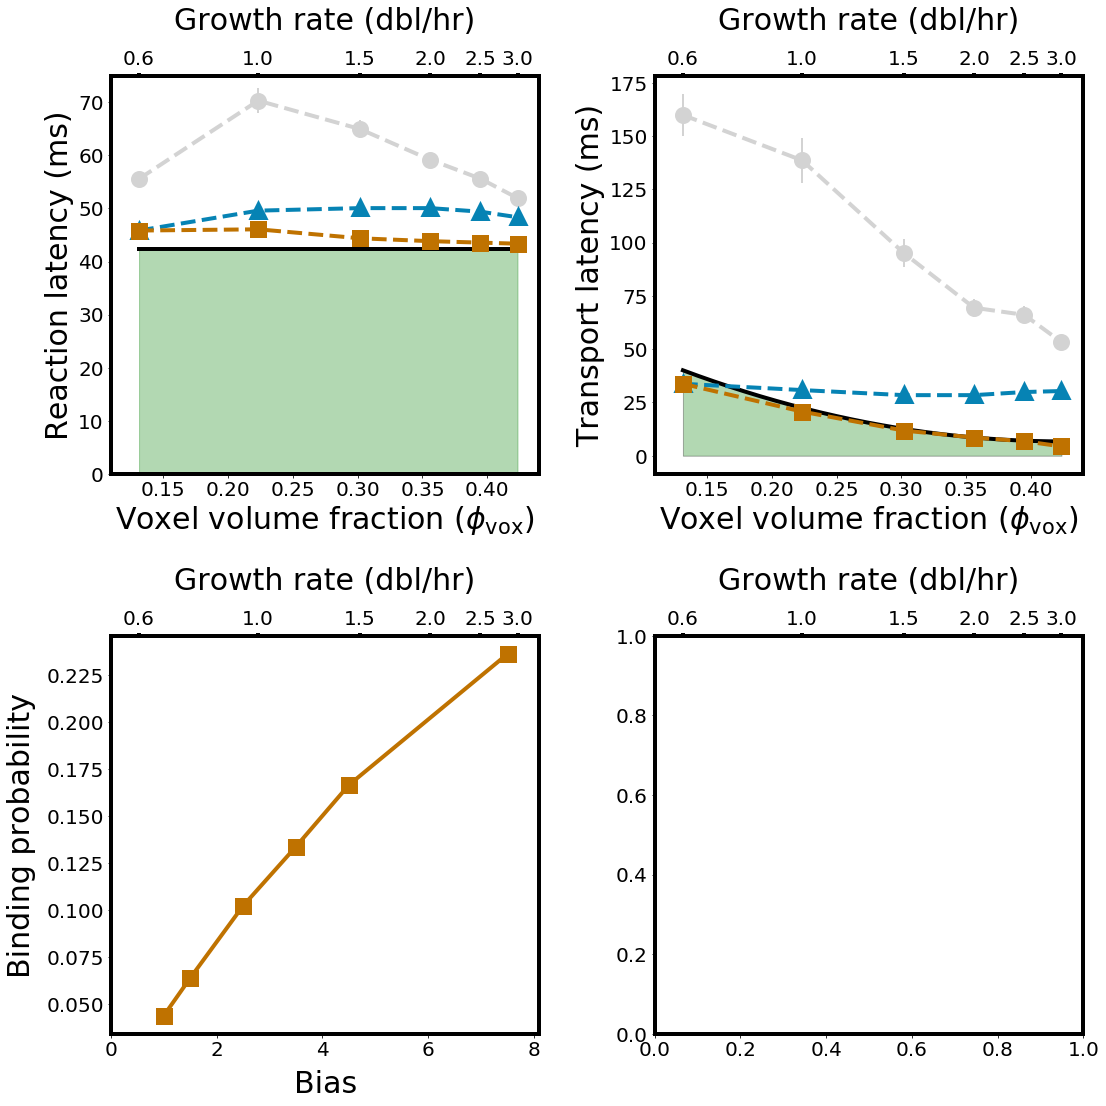

In [68]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd

phi_list = np.array([0.13172292, 0.22350473, 0.30181037, 0.35583449, 0.3945994 ,
       0.42317604])

##### Plot bias
fig, [[ax,ax1],[ax2,ax3]] = plt.subplots(2,2,figsize=(16,16))
ax2.errorbar(bias,pbind,0,zorder=2,marker='s',color='#bf7200',markersize=12,elinewidth=2,linewidth=4,markeredgewidth=5)
ax2.set_xlabel('Bias', size=30,labelpad=10)
ax2.set_ylabel('Binding probability', size=30,labelpad=10)
ax2.set_xlim(0,8.1)

### Plot reaction (BM vs. preload vs. preload-presort)

ax.errorbar(phi_list,bm_only_rxn,bm_only_rxn_sem,marker='o',markersize=12,markeredgewidth=5,zorder=1,linewidth=4,elinewidth=2,linestyle='dashed',color='lightgray')
ax.errorbar(phi_list,preload_rxn+(1000/1475+1000/1529+1000/209+1000/200+1000/32),zorder=3,marker='^',color='#0683b4',markersize=12,elinewidth=2,linewidth=4,markeredgewidth=5,linestyle='dashed')
ax.errorbar(phi_list,presortpreload_rxn+(1000/1475+1000/1529+1000/209+1000/200+1000/32),zorder=3,marker='s',color='#bf7200',markersize=12,elinewidth=2,linewidth=4,markeredgewidth=5,linestyle='dashed')

ax.set_ylim(0,75)
ax.set_yticks(np.arange(0,71,10))
ax.set_xticks(np.arange(0.15,0.43,0.05))
ax.set_xlim(0.11,0.44)
ax.set_xlabel('Voxel volume fraction $(\phi_{\mathrm{vox}})$',size=30,color='black')
ax.set_ylabel('Reaction latency (ms)',fontsize=30)

#Plot inferred experimental values of reaction latency (using data from literature)
y_model,SS_err,_,_,_ = np.polyfit(phi_list,[1000/1475+1000/1529+1000/209+1000/200+1000/32]*len(phi_list),2,full=True)
y_hat = np.polyval(y_model,phi_list)
x_sweep_i = np.linspace(min(phi_list),max(phi_list),1000)
y_hat_sweep_i = np.polyval(y_model, x_sweep_i)
ax.plot(x_sweep_i,y_hat_sweep_i,marker='o',zorder=1,markersize=0,markeredgewidth=5,markevery=199,linewidth=4,color='black')
ax.fill_between(x_sweep_i, y_hat_sweep_i, 0*y_hat_sweep_i, color='green',alpha=0.3)
exptl_rxn = y_hat_sweep_i

### Plot transport (BM vs. preload vs. preload-presort)

ax1.errorbar(phi_list,bm_only_trans,bm_only_tranport_sem,marker='o',markersize=12,markeredgewidth=5,zorder=1,linewidth=4,elinewidth=2,linestyle='dashed',color='lightgray')
ax1.errorbar(phi_list,preload_trans,0,zorder=3,marker='^',color='#0683b4',markersize=12,elinewidth=2,linewidth=4,markeredgewidth=5,linestyle='dashed')
ax1.errorbar(phi_list,presortpreload_trans,0,zorder=3,marker='s',color='#bf7200',markersize=12,elinewidth=2,linewidth=4,markeredgewidth=5,linestyle='dashed')

ax1.set_xticks(np.arange(0.15,0.43,0.05))
ax1.set_xlim(0.11,0.44)
ax1.set_xlabel('Voxel volume fraction $(\phi_{\mathrm{vox}})$',size=30,color='black')
ax1.set_ylabel('Transport latency (ms)',fontsize=30)


#Plot inferred experimental values of transport latency (using data from literature)
y_model,SS_err,_,_,_ = np.polyfit(phi_list,np.subtract([1000/12,1000/16,1000/18,1000/19,1000/20,1000/21],(1000/1475+1000/1529+1000/209+1000/200+1000/32)),2,full=True)
y_hat = np.polyval(y_model,phi_list)
x_sweep_i = np.linspace(min(phi_list),max(phi_list),1000)
y_hat_sweep_i = np.polyval(y_model, x_sweep_i)
ax1.plot(x_sweep_i,y_hat_sweep_i,marker='o',zorder=1,markersize=0,markeredgewidth=5,markevery=199,linewidth=4,color='black',label='Empirical bulk elongation')
ax1.fill_between(x_sweep_i, y_hat_sweep_i, 0*y_hat_sweep_i,edgecolor='black',alpha=0.3,facecolor='green')
exptl_trans = y_hat_sweep_i





for _,axes in enumerate([ax,ax1,ax2,ax3]):
    axes.spines['left'].set_linewidth(4)
    axes.spines['bottom'].set_linewidth(4)
    axes.spines['top'].set_linewidth(4)
    axes.spines['right'].set_linewidth(4)
    axes.tick_params(axis='both', which='major', labelsize=20)


    ax1 = axes.twiny()
    ax1.set_xlim(0.11,0.44)
    ax1.tick_params(axis='both', which='major',width=4, labelsize=20)
    ax1.set_xticks(phi_list)
    ax1.set_xlabel('Growth rate (dbl/hr)',size=30,color='black',labelpad=20)
    labels = [item.get_text() for item in ax1.get_xticklabels()]
    labels = ['0.6','1.0','1.5','2.0','2.5','3.0']
    ax1.set_xticklabels(labels)

plt.tight_layout(pad=3.0)


87.36667733366627
1.7804192682693518
1.0596906685825602
82.44545311560375
49.07084465480462
[0.03527151 0.02733814 0.01140215 0.00586519 0.0055494  0.00397396]


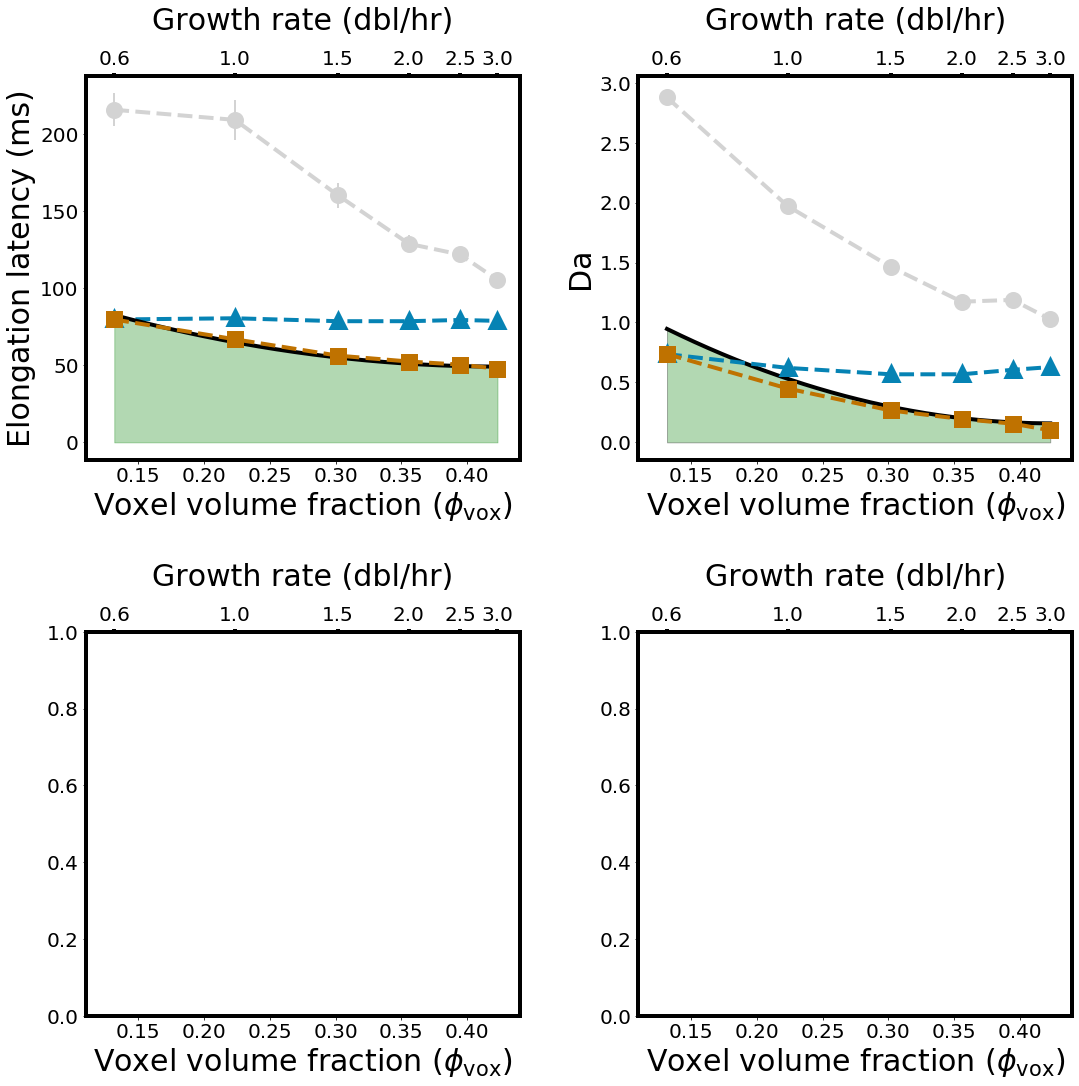

In [44]:
import matplotlib.pyplot as plt
fig,[[ax,ax2],[ax3,ax4]]= plt.subplots(2,2,figsize=(16,16))


###Experimental
x=np.array([0.13172292, 0.22350473, 0.30181037, 0.35583449, 0.3945994 ,
       0.42317604])
y_model,SS_err,_,_,_ = np.polyfit(x,[1000/12,1000/16,1000/18,1000/19,1000/20,1000/21],2,full=True)
y_hat = np.polyval(y_model,x)
x_sweep_i = np.linspace(min(x),max(x),1000)
y_hat_sweep_i = np.polyval(y_model, x_sweep_i)
ax.plot(x_sweep_i,y_hat_sweep_i,marker='o',markersize=0,markeredgewidth=5,markevery=199,linewidth=4,color='black')
ax.fill_between(x_sweep_i, y_hat_sweep_i, 0*y_hat_sweep_i, color='green',alpha=0.3)


#####Brownian motion only

ax.errorbar(x,bm_only_elong,bm_only_elong_sem,marker='o',markersize=12,markeredgewidth=5,zorder=4,linewidth=4,elinewidth=2,linestyle='dashed',color='lightgray',alpha=1)

######Preload
ax.errorbar(x, preload_elong+np.array([1000/1475+1000/1529+1000/209+1000/200+1000/32]),preload_elong_sem,zorder=1,marker='^',markersize=12,markeredgewidth=5,linewidth=4,elinewidth=2,linestyle='dashed',color='#0683b4',alpha=1)

print((45+1000/1475+1000/1529+1000/209+1000/200+1000/32))
print((45+1000/1475+1000/1529+1000/209+1000/200+1000/32)/y_hat_sweep_i[-1])
print((45+1000/1475+1000/1529+1000/209+1000/200+1000/32)/y_hat_sweep_i[0])
print(y_hat_sweep_i[0])

print(y_hat_sweep_i[-1])

######Preload + Presort
ax.errorbar(x,presortpreload_elong+np.array([1000/1475+1000/1529+1000/209+1000/200+1000/32]),presortpreload_sem,zorder=4,marker='s',markersize=12,markeredgewidth=5,linewidth=4,elinewidth=2,color='#bf7200',linestyle='dashed',alpha=1)

##### Plot Da (Subplot 4) ######
##Plot Damkohler number predicted by our simulation

bm_Da_var = (bm_only_trans**2/bm_only_rxn**2)*(bm_only_tranport_sem**2/bm_only_trans**2+bm_only_rxn_sem**2/bm_only_rxn**2)
print(bm_Da_var)
ax2.errorbar(phi_list,bm_only_trans/bm_only_rxn,bm_Da_var,marker='o',markersize=12,markeredgewidth=5,zorder=1,linewidth=4,elinewidth=2,linestyle='dashed',color='lightgray')
ax2.set_xlabel('Voxel volume fraction $(\phi_{\mathrm{vox}})$',size=30,color='black')
ax2.set_ylabel('Da',fontsize=30)

## Plot pre-load Da
ax2.errorbar(phi_list, preload_trans/(preload_rxn+(1000/1475+1000/1529+1000/209+1000/200+1000/32)),0,marker='^',markersize=12,markeredgewidth=5,zorder=2,linewidth=4,elinewidth=2,linestyle='dashed',color='#0683b4')

### Plot pre-sort+pre-load Da
ax2.errorbar(phi_list, presortpreload_trans/(presortpreload_rxn+(1000/1475+1000/1529+1000/209+1000/200+1000/32)),0,marker='s',markersize=12,markeredgewidth=5,zorder=2,linewidth=4,elinewidth=2,linestyle='dashed',color='#bf7200')


#Plot inferred experimental values of Damkohler number (using data from literature)
ax2.plot(x_sweep_i,exptl_trans/exptl_rxn,marker='o',markersize=0,markeredgewidth=5,markevery=199,linewidth=4,color='black',label='Empirical bulk elongation')
ax2.fill_between(x_sweep_i, exptl_trans/exptl_rxn, 0*y_hat_sweep_i,edgecolor='black',alpha=0.3,facecolor='green')


ax.set_ylabel(r'Elongation latency (ms)',size=30,color='black')
ax2.set_ylabel(r'Da',size=30,color='black')
for ax in [ax,ax2,ax3,ax4]:
    
    ax1 = ax.twiny()
    ax1.set_xlim(0.11,0.44)
    ax1.tick_params(axis='both', which='major',width=4, labelsize=20)
    #ax1.scatter(x_sweep_i,y_hat_sweep_i)
    ax1.set_xticks(x)
    ax1.set_xlabel('Growth rate (dbl/hr)',size=30,color='black',labelpad=20)
    labels = [item.get_text() for item in ax1.get_xticklabels()]
    labels = ['0.6','1.0','1.5','2.0','2.5','3.0']
    ax1.set_xticklabels(labels)
    #ax.set_ylim(0,300)
    
    ax.spines['left'].set_linewidth(4)
    ax.spines['bottom'].set_linewidth(4)
    ax.spines['top'].set_linewidth(4)
    ax.spines['right'].set_linewidth(4)
    ax.tick_params(axis='both', which='major', labelsize=20)
    ax.set_xlim(0.11,0.44)
    ax.set_xticks(np.arange(0.15,0.41,0.05))

    ax.set_xlabel(r'Voxel volume fraction $(\phi_{\mathrm{vox}})$',size=30,color='black')


plt.tight_layout(pad=4.0)

In [66]:
bm_only_elong/(preload_elong+np.array([1000/1475+1000/1529+1000/209+1000/200+1000/32]))

array([2.70729297, 2.59869541, 2.03953469, 1.63888709, 1.53525367,
       1.33778994])

In [62]:
preload_elong

array([37.21572117, 38.01854794, 36.11724642, 36.11724642, 36.90940779,
       36.32934838])

In [63]:
bm_only_elong

array([215.45286838, 208.89671564, 160.07068473, 128.62628955,
       121.70890039, 105.27875132])